In [54]:
from sklearn.datasets import make_blobs 
#genera punti in maniera casuale, situati su una gaussiana
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans

plt.rcParams["figure.dpi"]=150
#imposta la risoluzione del grafico in punti per pollice, valoe piu alto= grafico piu nitido ma piu tempo e memoria
plt.rcParams["figure.figsize"]=(10,6)
#imposta le dimensioni predefinite della figura in polici, larghezza x altezza

Generiamo un dataset con due features 

In [ ]:
centers=[
    [1,0.5], #primo cluster
    [2,2],   #secondo cluster
    [-5,-0.5]
]

stds= [0.4,0.2,0.05]
X,y=make_blobs(
    n_samples=1000, 
    centers=centers, 
    cluster_std=stds, 
    random_state=42
)

print(X.shape)
print(y.shape)

<Axes: >

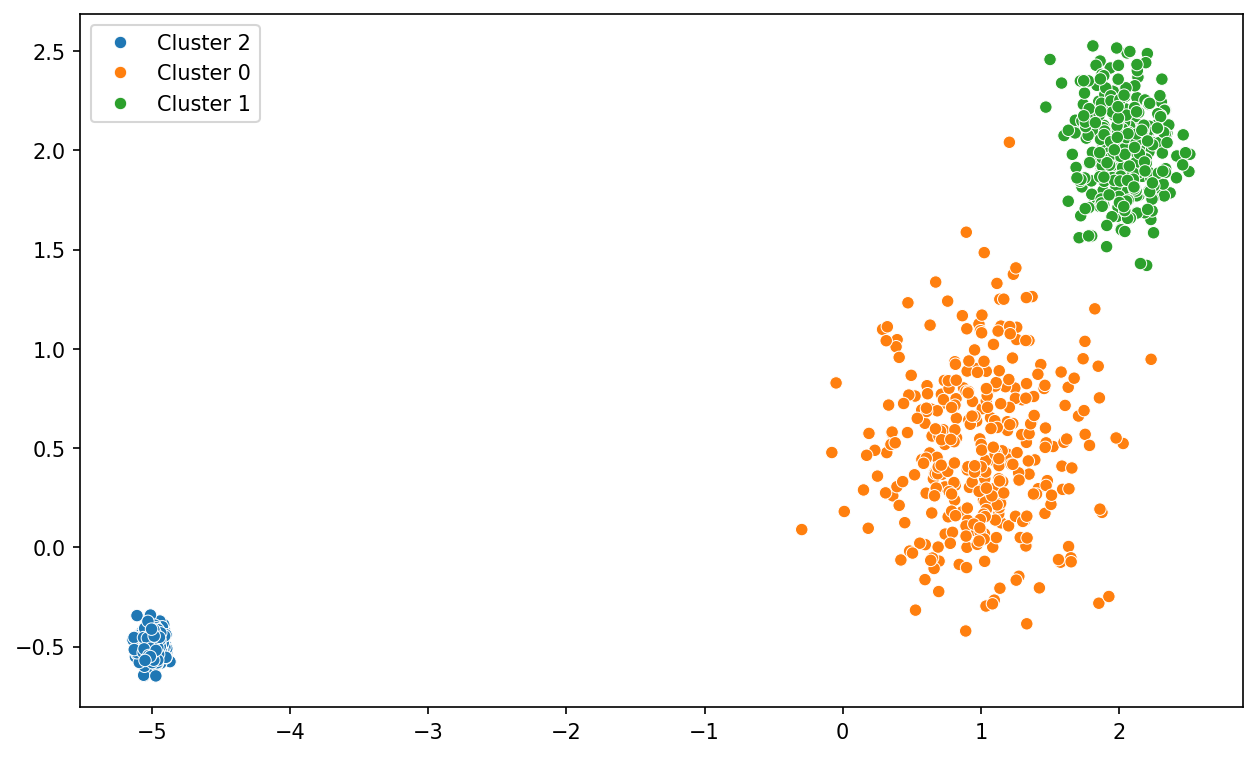

In [55]:
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=[f"Cluster {x}" for x in y]
)


<Axes: >

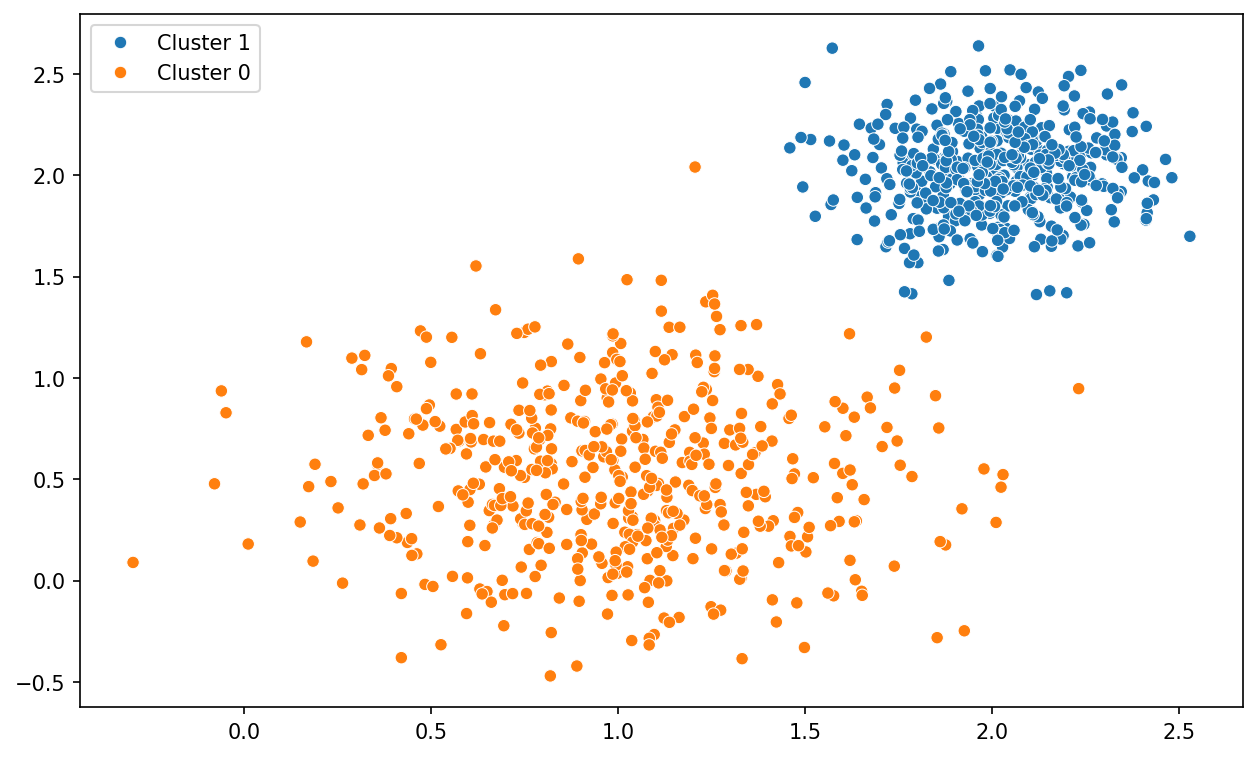

In [57]:
centers=[
    [1,0.5], 
    [2,2],  
]

stds= [0.4,0.2]
X,y=make_blobs(
    n_samples=1000, 
    centers=centers, 
    cluster_std=stds, 
    random_state=42
)

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=[f"Cluster {x}" for x in y]
)


In [58]:
db= DBSCAN(
    eps=0.5, #epsilon valore di default, raggio del cerchio di identificazione dei vicini
    min_samples=10  #per l'individuazione del core point
).fit(X)

labels = db.labels_

print(np.array(labels).shape)


(1000,)


N cluster individuati: 0
N outliers individuati: 0


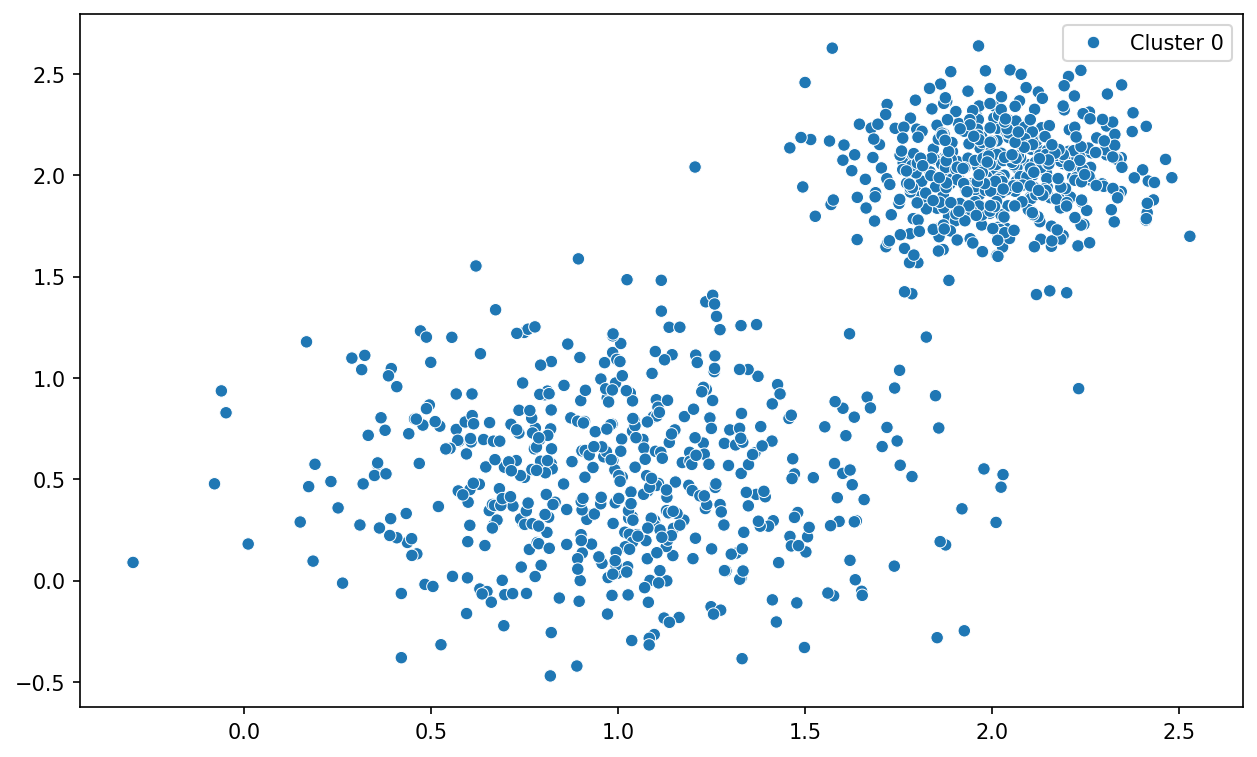

In [59]:
def describe_dbscan(X,labels):
    n_clusters=len(set(labels))
    if 0 in labels:
        n_clusters=n_clusters-1 #per eliminare il cluster degli outliers
    print(f"N cluster individuati: {n_clusters}")
    print(f"N outliers individuati: {list(labels).count(-1)}")
    sns.scatterplot(
        x=X[:,0],
        y=X[:,1],
        hue=[f"Cluster {x}" for x in labels]
    )
describe_dbscan(X, labels)


Per determinare il valore ottimo di epsilon

for i
for j = 1 to n
    d(i,j)
find minimum values of distances to nearest 3 
    end for
end for
sort distances acending and plot to find each value
eps corresponds to critical change in curves

In [93]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=11)
neighbors=nn.fit(X)
distances, indices=nn.kneighbors(X) #tutte le distanze degli 11 vicini per tutte le osservazioni nel dataset
print(distances.shape)
print(distances[0])

distances=np.sort(distances[:,10], axis=0)

#i = np.arange(len(distances))

(1000, 11)
[0.         0.01385376 0.02073425 0.02130078 0.02661348 0.02714839
 0.03482333 0.03638316 0.03781438 0.03944942 0.040289  ]


Text(0, 0.5, 'distanze')

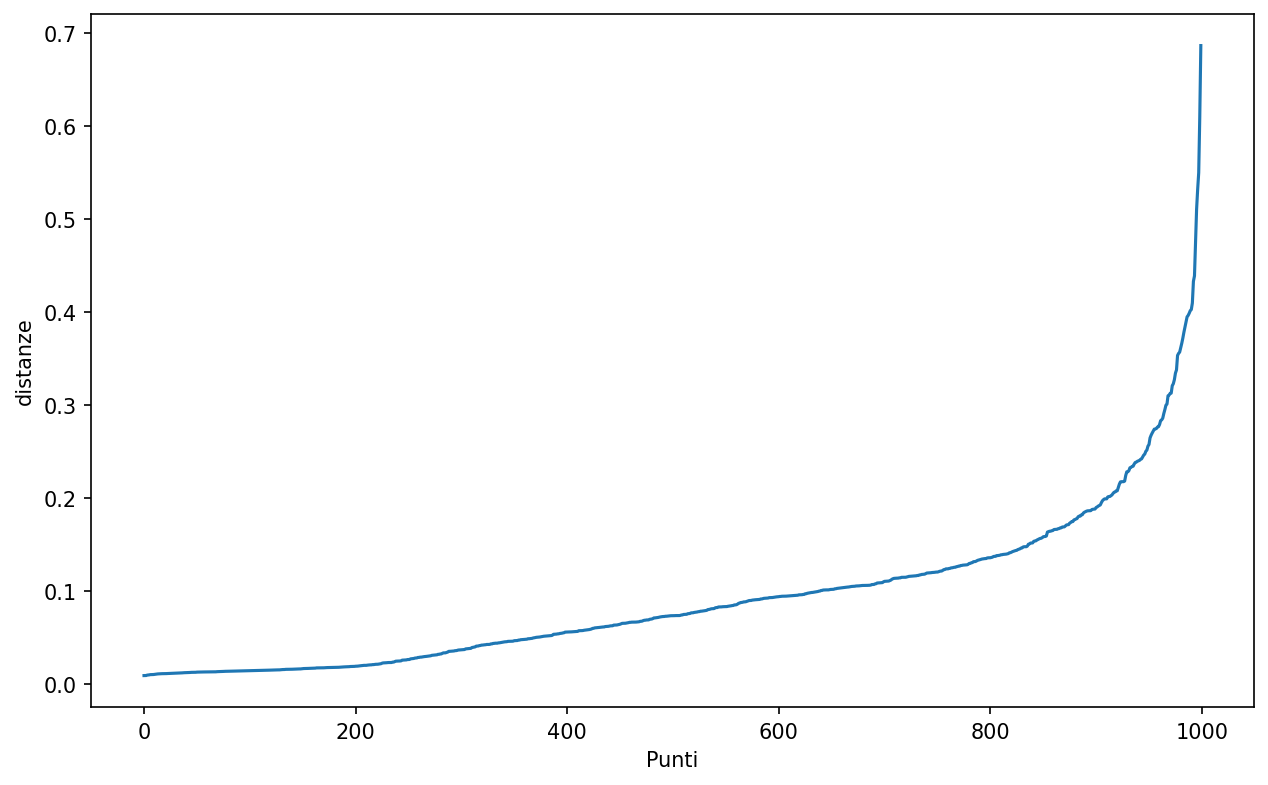

In [60]:
fig=plt.figure()
plt.plot(distances)
plt.xlabel("Punti")
plt.ylabel("distanze")

Vediamo che il valore ottimale di epsilon non è 0.5 ma sarà nella fascia (0.15, 0.4) citical change value

N cluster individuati: 2
N outliers individuati: 5


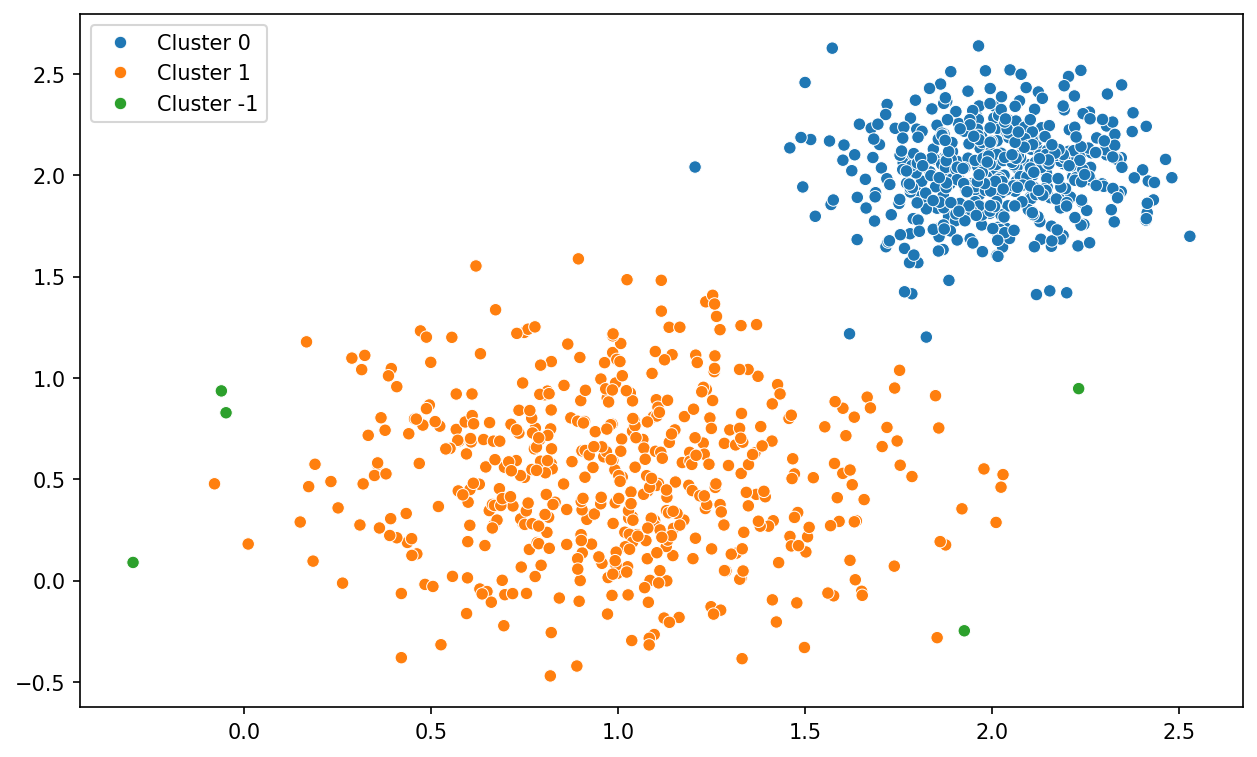

In [62]:
db = DBSCAN(
    eps=0.3, 
    min_samples = 10
).fit(X)

describe_dbscan(X, db.labels_)

0.20330420620520254


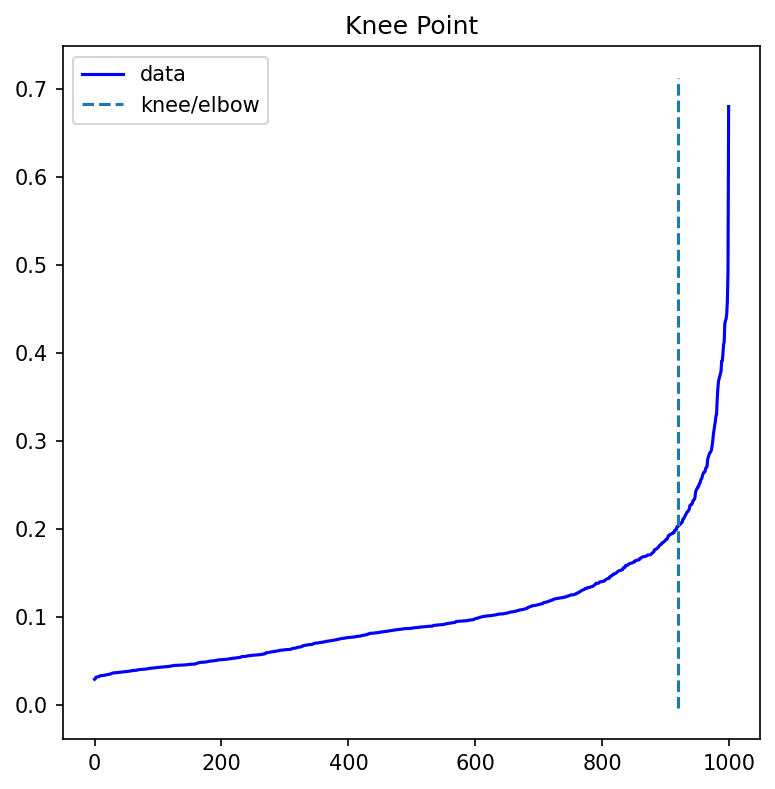

In [94]:
#!pip3 install kneed
from kneed import KneeLocator

i = np.arange(len(distances))
kl=KneeLocator(
    i,
    distances,
    curve="convex"
)
kl.plot_knee()

print(distances[kl.knee])

N cluster individuati: 2
N outliers individuati: 18


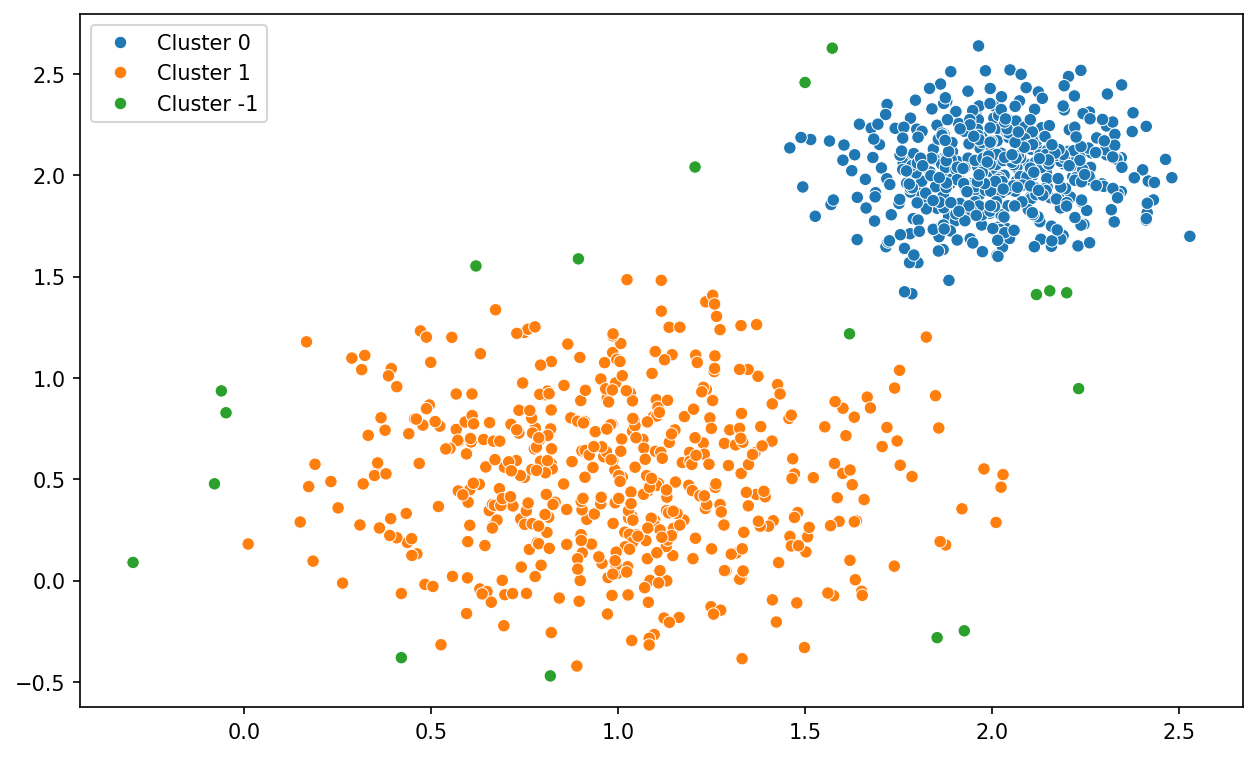

In [95]:
db = DBSCAN(
    eps=distances[kl.knee], 
    min_samples = 5
).fit(X)

describe_dbscan(X, db.labels_)